In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

In [53]:
df = pd.read_csv('AirQuality.csv', sep = ';')

## Reading Data

In [54]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [55]:
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


## Preprocessing and EDA

In [57]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [58]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [59]:
df = df.dropna()

In [60]:
problematic_columns = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH' ]
df[problematic_columns] = df[problematic_columns].replace(',', '.', regex=True).astype(float)

In [61]:
continous = [i for i in df.columns if df[i].dtypes == 'float']

In [62]:
df_val = df[continous]

In [63]:
df_val.shape, df.shape

((9357, 13), (9357, 15))

In [64]:
df_val.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [65]:
df_val.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0000,-200.0000,-200.0000,1189.000
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0000,942.0000,1255.0000,2523.000


In [66]:
stats_df = df.describe().loc[['mean', 'std']]

# Calculate skewness and kurtosis
skewness = df.skew(numeric_only=None)
kurt = df.kurtosis(numeric_only=None)

# Add skewness and kurtosis to the stats DataFrame
stats_df.loc['skewness'] = skewness
stats_df.loc['kurtosis'] = kurt

# Transpose the DataFrame for better readability
stats_df = stats_df.T
columns = {'mean':'Mean', 'std' : 'Standard Deviation', 'skewness' : 'Skewness', 'kurtosis': 'Kurtosis'}
stats_df = stats_df.rename(columns = columns)
# Display the table
stats_df

,Mean,Standard Deviation,Skewness,Kurtosis
CO(GT),-34.207524,77.657170,-1.666180,0.778306
PT08.S1(CO),1048.990061,329.832710,-1.721503,5.836936
NMHC(GT),-159.090093,139.789093,4.075784,18.863824
C6H6(GT),1.865683,41.380206,-4.508763,19.188651
PT08.S2(NMHC),894.595276,342.333252,-0.793435,2.370089
NOx(GT),168.616971,257.433866,0.825232,1.505417
PT08.S3(NOx),794.990168,321.993552,-0.384760,3.104826
NO2(GT),58.148873,126.940455,-1.225630,0.275599
PT08.S4(NO2),1391.479641,467.210125,-1.244110,3.267028
PT08.S5(O3),975.072032,456.938184,-0.034662,0.638297


In [67]:
def compare_pollutants(dataframe, columns):
    """
    Create a grouped bar plot comparing multiple categories from a DataFrame.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to compare.

    Returns:
    None
    """
    # Subset the DataFrame to select columns for comparison
    subset_df = dataframe[columns]

    # Convert object columns to numeric (assuming they contain numerical data)
    subset_df = subset_df.apply(pd.to_numeric, errors='coerce')

    # Melt the DataFrame to have columns as categorical variables
    melted_df = pd.melt(subset_df)

    # Create the grouped bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='variable', y='value', data=melted_df, estimator=pd.Series.mean, ci=None)
    
    # Adding labels and title
    plt.xlabel('Pollutant')
    plt.ylabel('Average Value')
    plt.title('Average Pollution Levels Comparison')
    plt.xticks()  # Rotate x-axis labels for better readability
    plt.show()


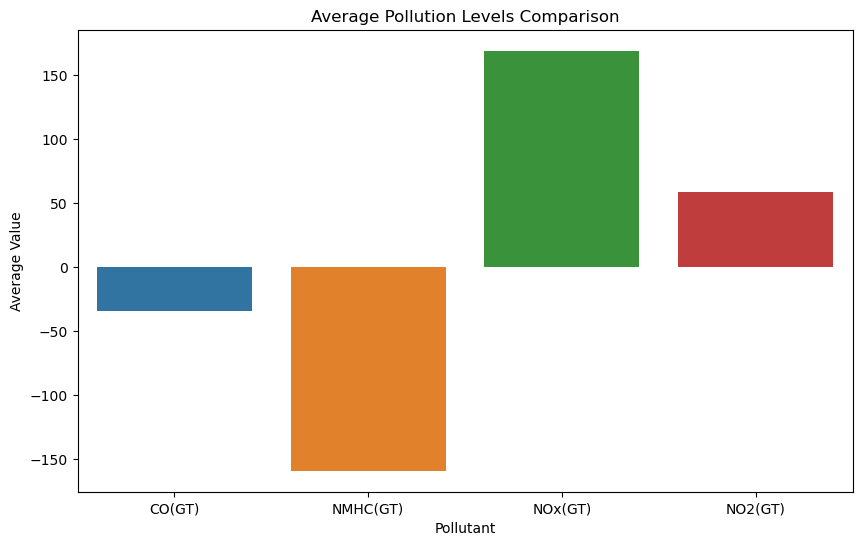

In [68]:
pollutants = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
compare_pollutants(df, pollutants)

In [69]:
def check_for_outliers(dataframe):
    """
    Check for outliers in the numerical data of a DataFrame using a boxplot.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe)
    plt.title("Boxplot of all the numerical values")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.xticks(rotation=90)
    plt.show()

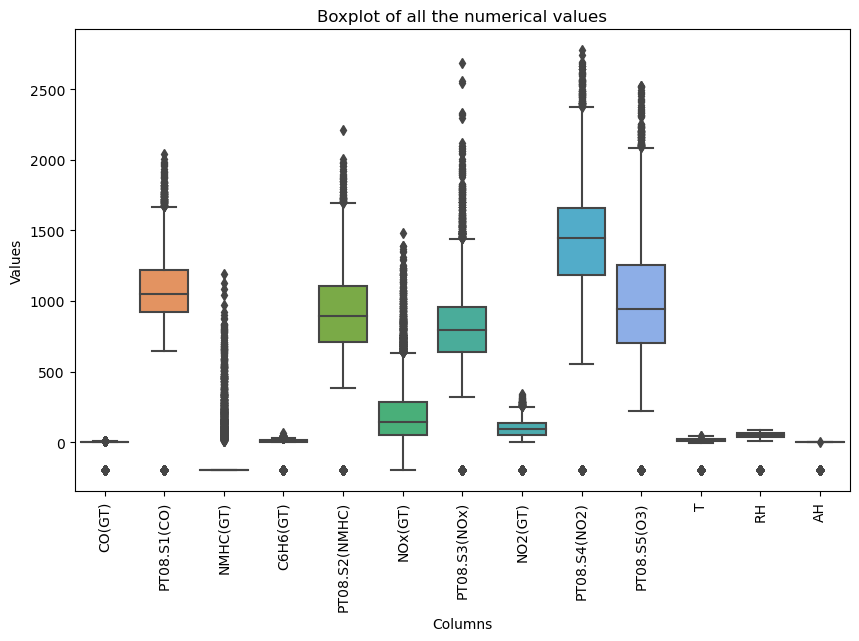

In [70]:
check_for_outliers(df_val)

In [71]:
def remove_outliers(df):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate the interquartile range (IQR) for each column
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where any column value is outside the bounds
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [72]:
df_val = remove_outliers(df_val)

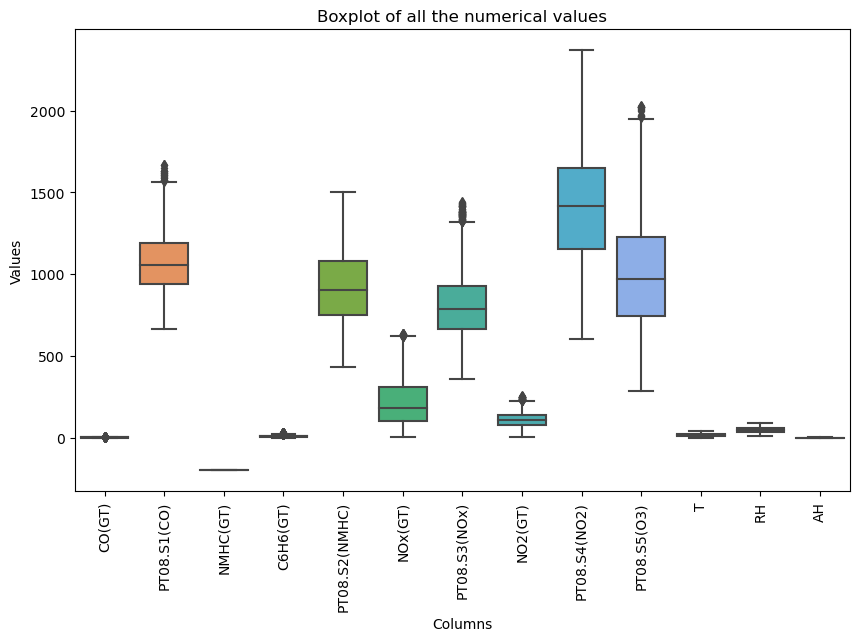

In [73]:
check_for_outliers(df_val)

In [74]:
del df_val['NMHC(GT)']

In [75]:
def visualize_correlation(dataframe):
    """
    Visualize the correlation matrix of a DataFrame using a heatmap.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))
    sns.heatmap(dataframe.corr(), annot=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


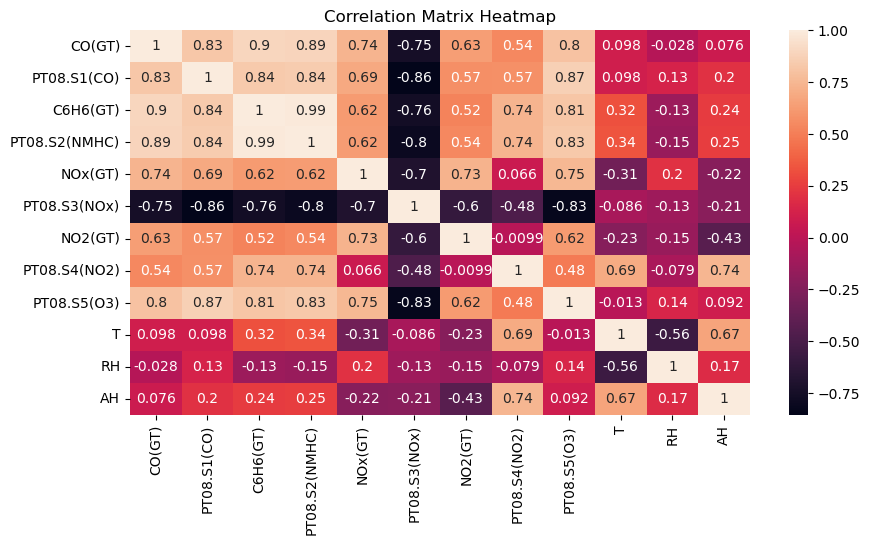

In [76]:
visualize_correlation(df_val)

## Fitting

In [77]:
def fit_linear_regression(data):
    """
    Fit a linear regression model to analyze the relationship between
    a dependent variable and an independent variable with train-test split.

    Parameters:
    - dataset (DataFrame): The dataset containing the variables.
    - independent_var (str): The name of the independent variable.
    - dependent_var (str): The name of the dependent variable.
    - test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    - model (LinearRegression): Fitted linear regression model.
    - X_test (DataFrame): Independent variable values for the test data.
    - y_test (Series): Actual test values of the dependent variable.
    """

    # Split the dataset into training and testing sets
    X = data[independent_var]
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
    
    # Reshape X_train and X_test to 2D arrays
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, X_test, y_test



In [78]:

# Define independent and dependent variables
independent_var = 'C6H6(GT)'  # BENZENE
dependent_var = 'CO(GT)'  # CO(GT)

# Fit linear regression model with train-test split for CO(GT) and temperature (T)
model, X_test, y_test = fit_linear_regression(df_val)

# Evaluate model performance
predictions = model.predict(X_test)


### Fitting Model Evaluation

In [79]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.2401555355451308
R-squared Score: 0.8104201406382118


In [80]:
confidence = 0.95
n = len(X_test)
mean_x = np.mean(X_test)
t_value = 2.262  # for 95% confidence interval with n-2 degrees of freedom
se = np.sqrt(np.sum((y_test - predictions)**2) / (n - 2))
margin_of_error = t_value * se
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error


In [81]:
def plot_regression_results(X_test, y_test, predictions, margin_of_error):
    """
    Plot the results of a regression model, including actual vs. predicted values with confidence intervals.

    Parameters:
        X_test (array-like): The feature values for testing.
        y_test (array-like): The actual target values for testing.
        predictions (array-like): The predicted target values.
        margin_of_error (array-like): The margin of error for each prediction.

    Returns:
        None
    """
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual (CO(GT))', marker='o')
    plt.plot(X_test, predictions, color='orange', label='Predicted (CO(GT))', marker='x')
    plt.errorbar(X_test, predictions, yerr=margin_of_error, fmt='o', color='green', label='95% Confidence Intervals', capsize=4, elinewidth=0.5, capthick=0.5)
    plt.xlabel('Temperature (C6H6(GT))')
    plt.ylabel('CO (CO(GT))')
    plt.title('Fitted Regression Line with Confidence Intervals')
    plt.legend()
    plt.grid(True)

    plt.show()



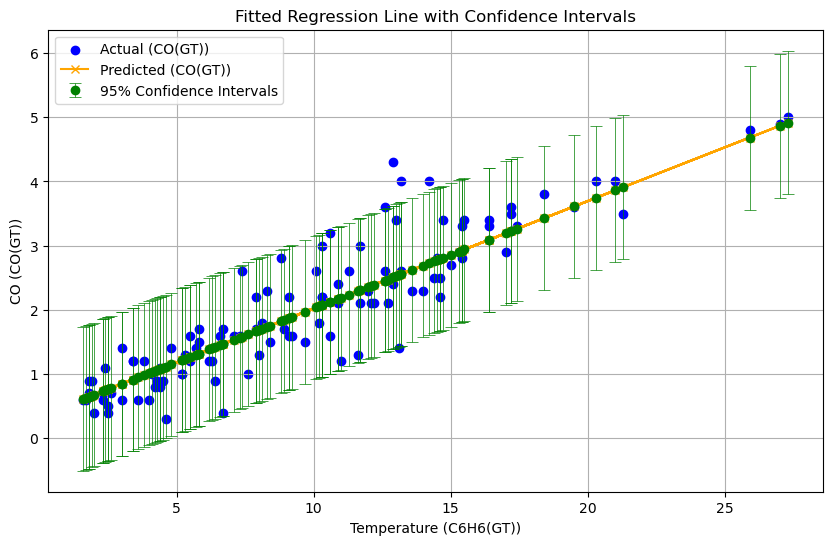

In [82]:
plot_regression_results(X_test, y_test, predictions, margin_of_error)

### Fitting Model Evaluation

In [83]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.2401555355451308
R-squared Score: 0.8104201406382118


### Residual Analysis

In [84]:
import matplotlib.pyplot as plt

def plot_residuals(predictions, residuals):
    """
    Plot the residuals of a regression model.

    Parameters:
        predictions (array-like): Predicted values from the regression model.
        residuals (array-like): Residuals (actual - predicted) from the regression model.

    Returns:
        None

    This function creates a scatter plot of predicted values versus residuals.
    The residuals are the differences between the actual target values and the predicted values.
    A horizontal dashed line at y=0 is drawn to represent perfect predictions.
    """
    # Create a scatter plot of predictions versus residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions, residuals)
    
    # Add a horizontal line at y=0
    plt.axhline(y=0, color='r', linestyle='--')
    
    # Set plot title and labels
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    
    # Show the plot
    plt.show()



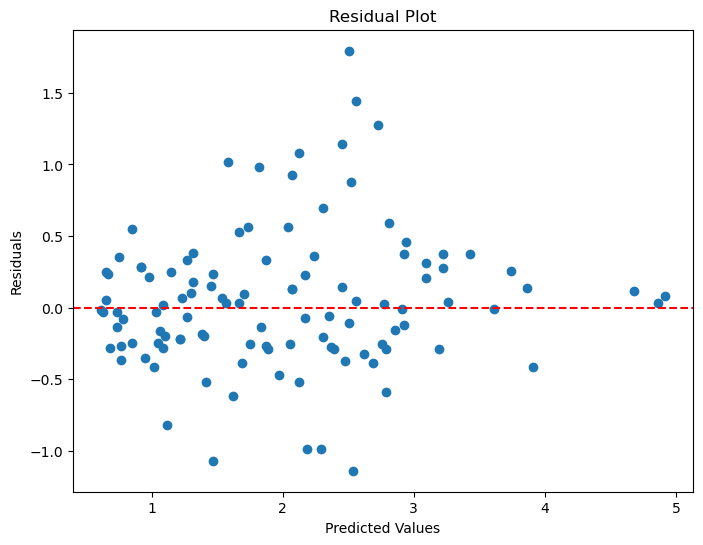

In [85]:
plot_residuals(predictions, residuals)

## Clustering 

In [86]:
df_val.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

### Analysis for optimal Attributes

In [87]:
# Correlation Analysis
numeric_data = df_val.copy()

# Handle missing values if any
numeric_data = numeric_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

correlation_matrix = numeric_data.corr()
# Select variables with high correlation coefficient (> 0.5 or <-0.5)
high_corr_vars = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

print("Highly correlated variables:")
print(high_corr_vars)

Highly correlated variables:
                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.825238  0.897716       0.890678  0.736020   
PT08.S1(CO)    0.825238     1.000000  0.836470       0.842674  0.685111   
C6H6(GT)       0.897716     0.836470  1.000000       0.988320  0.618527   
PT08.S2(NMHC)  0.890678     0.842674  0.988320       1.000000  0.623820   
NOx(GT)        0.736020     0.685111  0.618527       0.623820  1.000000   
PT08.S3(NOx)  -0.751171    -0.855462 -0.761795      -0.798224 -0.702389   
NO2(GT)        0.632304     0.566153  0.518589       0.541232  0.730964   
PT08.S4(NO2)   0.536160     0.574957  0.735198       0.738070       NaN   
PT08.S5(O3)    0.802646     0.868828  0.814160       0.826075  0.746371   
T                   NaN          NaN       NaN            NaN       NaN   
RH                  NaN          NaN       NaN            NaN       NaN   
AH                  NaN          NaN       NaN            NaN       NaN

In [88]:
# Feature Importance Ranking using Random Forest Regressor
X = numeric_data.drop(columns=['PT08.S4(NO2)'])  # Assuming 'CO(GT)' is the target variable
y = numeric_data['PT08.S4(NO2)']
regressor = RandomForestRegressor()
regressor.fit(X, y)
feature_importance = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature importance ranking using Random Forest Regressor:")
print(feature_importance)



Feature importance ranking using Random Forest Regressor:
AH               0.508353
PT08.S2(NMHC)    0.257426
T                0.098929
C6H6(GT)         0.061003
NOx(GT)          0.049214
PT08.S3(NOx)     0.007721
RH               0.005081
PT08.S1(CO)      0.004351
PT08.S5(O3)      0.003621
NO2(GT)          0.002483
CO(GT)           0.001819
dtype: float64


In [89]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Set the number of components as per your requirement
pca.fit(scaled_data)
pca_components = pca.components_
print("\nPrincipal Components from PCA:")
print(pca_components)


Principal Components from PCA:
[[ 3.59042118e-01  3.60192552e-01  3.69032229e-01  3.73023702e-01
   2.90468511e-01 -3.45563641e-01  2.49919588e-01  2.49977116e-01
   3.54002369e-01  7.41172764e-02 -1.77224215e-04  8.04548934e-02]
 [ 5.17193443e-02  2.60014750e-02 -9.41657806e-02 -9.61457513e-02
   3.24199213e-01 -5.00943431e-02  3.31552882e-01 -4.28676962e-01
   9.96292151e-02 -5.38596938e-01  1.79588148e-01 -4.94941879e-01]]


In [90]:
import warnings
warnings.filterwarnings("ignore")

### Elbow Method and Silhouette Score

In [91]:
selected_columns = ['PT08.S4(NO2)', 'RH','T']
data = df_val[selected_columns]

# Normalize and back-scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, clusters))

# Based on the elbow curve or silhouette score, choose the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting at 2 clusters


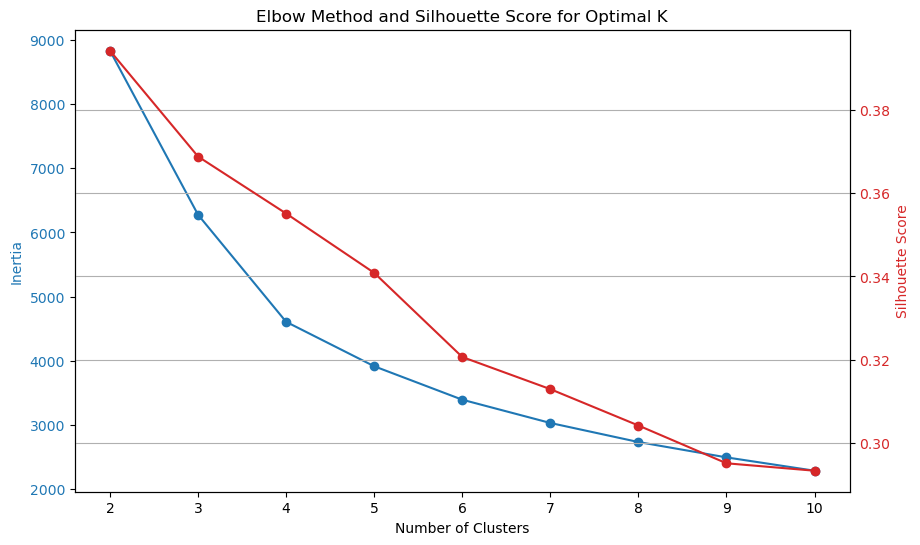

In [92]:
def plot_elbow_curve_and_silhouette_scores(inertia, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores to find the optimal number of clusters.

    Parameters:
        inertia (list or array-like): List of inertia values for different numbers of clusters.
        silhouette_scores (list or array-like): List of silhouette scores for different numbers of clusters.

    Returns:
        None

    This function plots the elbow curve and silhouette scores to help determine the optimal number of clusters
    for a clustering algorithm. The elbow curve shows the inertia (within-cluster sum of squares) for different
    numbers of clusters, while the silhouette scores measure the compactness and separation of clusters.
    The optimal number of clusters is often identified as the point where the inertia starts to decrease
    at a slower rate (the "elbow" point) and the silhouette score is highest.
    """
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot inertia (elbow curve)
    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, 11), inertia, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a twin axis for silhouette scores
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set plot title, ticks, and grid
    plt.title('Elbow Method and Silhouette Score for Optimal K')
    plt.xticks(range(2, 11))
    plt.grid(True)

    # Show the plot
    plt.show()

plot_elbow_curve_and_silhouette_scores(inertia, silhouette_scores)

### Cluster Formation

In [93]:
def perform_clustering(data, num_clusters):
    """
    Perform K-means Clustering on the given data.

    Parameters:
    - data (array-like): The input data for clustering.
    - num_clusters (int): The number of clusters to form.

    Returns:
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Inverse transform cluster centers to original feature space
    cluster_centers = scaler.inverse_transform(cluster_centers)
    
    return clusters, cluster_centers

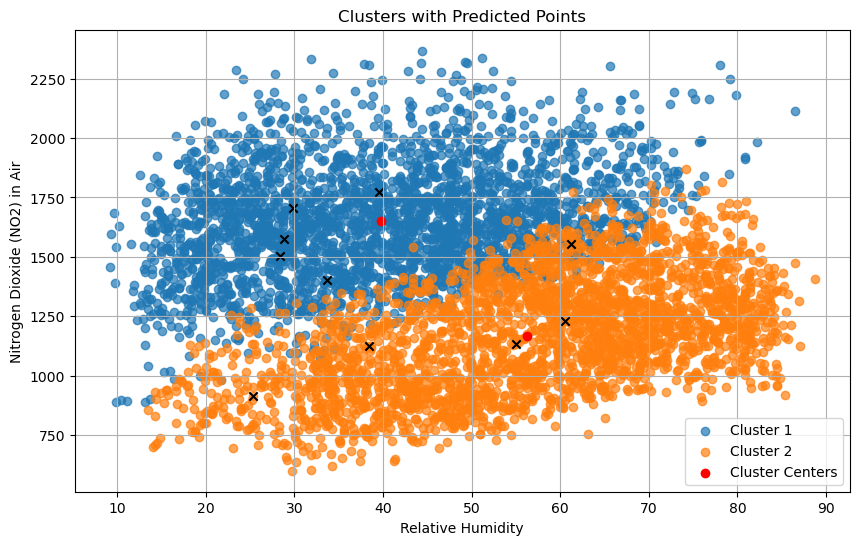

In [94]:
def visualize_clusters(data, clusters, cluster_centers, kmeans):
    """
    Visualize the clusters along with predicted points.

    Parameters:
    - data (array-like): The original data.
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    - Agglomerative : Fitted KMeans model.
    """
    # Visualize original data points
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        cluster_data = data[clusters == cluster]
        plt.scatter(cluster_data[:, 1], cluster_data[:, 0], label=f'Cluster {cluster+1}', alpha=0.7)
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='o', color='red', label='Cluster Centers')
    # Predict and visualize additional points
    for center in cluster_centers:
        # Generate multiple random points around each cluster center
        for _ in range(5):
            random_index = np.random.randint(len(data))
            random_point = data[random_index] + np.random.randn(1, data.shape[1]) * 0.1
            cluster_label = kmeans.predict(random_point)[0]
            plt.scatter(random_point[:, 1], random_point[:, 0], marker='x', color='black')
    
    plt.xlabel('Relative Humidity')
    plt.ylabel('Nitrogen Dioxide (NO2) in Air')
    plt.title('Clusters with Predicted Points')
    plt.legend()
    plt.grid(True)
    plt.savefig('clustring')
    plt.savefig('cluster')
    plt.show()
    


clusters, cluster_centers = perform_clustering(data, optimal_k)
visualize_clusters(data.values, clusters, cluster_centers, kmeans)

In [95]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.39424233827959665
